In [2]:
import pandas as pd
traindf = pd.read_csv("train.csv", encoding="utf-8")
testdf = pd.read_csv("test.csv", encoding="utf-8")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# 檢查缺少東西為何
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# 補數值的缺失,利用中位數 , test不需要重算中位數
med = traindf.median()
traindf = traindf.fillna(med)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 補測試資料數值的缺失(要用測試的中位數來補)
testdf = testdf.fillna(med)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
# 類別缺失用最常出現
# --->cabin缺少很多，不可任意放棄，要先注意是否可以放棄
most = traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"] = traindf["Embarked"].fillna(most)
testdf["Embarked"] = testdf["Embarked"].fillna(most)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
# 所有類別值請轉 One-Hot Encoding，取值之後轉成dummy
dummy = pd.get_dummies(traindf["Embarked"])
# 轉好後加進去並規格為一行新的值
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0


In [8]:
dummy = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0,1,0


In [9]:
# 取中間的 name
"Braund, Mr. Owen Harris".split(",")[-1].split(".")[0].replace(" ", "")

'Mr'

In [10]:
def nameflow(name):
    return name.split(",")[-1].split(".")[0].replace(" ", "")
traindf["Name"].apply(nameflow)

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Name, Length: 891, dtype: object

In [11]:
# crosstab 針對身分特徵評估，兩個表格做交叉比對(T表示轉成橫的)
pd.crosstab(traindf["Name"].apply(nameflow), traindf["Survived"]).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [12]:
# 留下該留的丟掉不要的，做one hot encoding
def nameflow(name):
    title = name.split(",")[-1].split(".")[0].replace(" ", "")
    if title == "Miss":
        return "Miss"
    elif title == "Mr":
        return "Mr"
    elif title == "Mrs":
        return "Mrs"
    else:
        return "Throw"
dummy = pd.get_dummies(traindf["Name"].apply(nameflow))
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf["Name"].apply(nameflow))
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,...,Q,0,1,0,0,1,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,0,0,1,0,1,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,0,0,1,0,1,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,0,0,1,1,0,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,1,0,0,1,0,0,0,1,0


In [13]:
# drop
drop_column = ["Name", "Sex", "Ticket", "Cabin", "Embarked", "Throw"]
traindf = traindf.drop(drop_column, axis=1)
traindf

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
5,6,0,3,28.0,0,0,8.4583,0,1,0,0,1,0,1,0
6,7,0,1,54.0,0,0,51.8625,0,0,1,0,1,0,1,0
7,8,0,3,2.0,3,1,21.0750,0,0,1,0,1,0,0,0
8,9,1,3,27.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,10,1,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,1


In [14]:
testdf = testdf.drop(drop_column, axis=1)
testdf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
5,897,3,14.0,0,0,9.2250,0,0,1,0,1,0,1,0
6,898,3,30.0,0,0,7.6292,0,1,0,1,0,1,0,0
7,899,2,26.0,1,1,29.0000,0,0,1,0,1,0,1,0
8,900,3,18.0,0,0,7.2292,1,0,0,1,0,0,0,1
9,901,3,21.0,2,0,24.1500,0,0,1,0,1,0,1,0


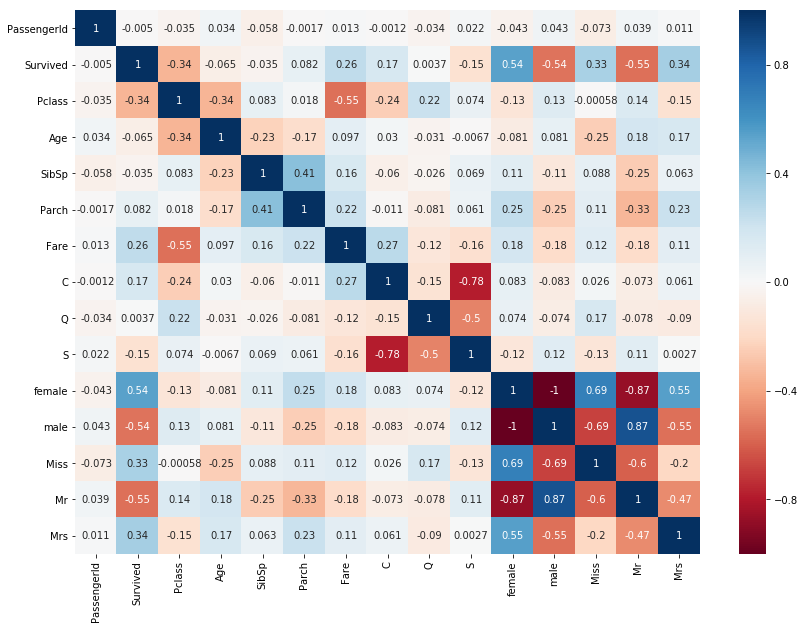

In [15]:
# 畫圖找出特徵對我們有幫助(透過相關係數)--->seaborn
# corr 相關係數(pandas)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,10))
sns.heatmap(traindf.corr(), annot=True, cmap="RdBu")

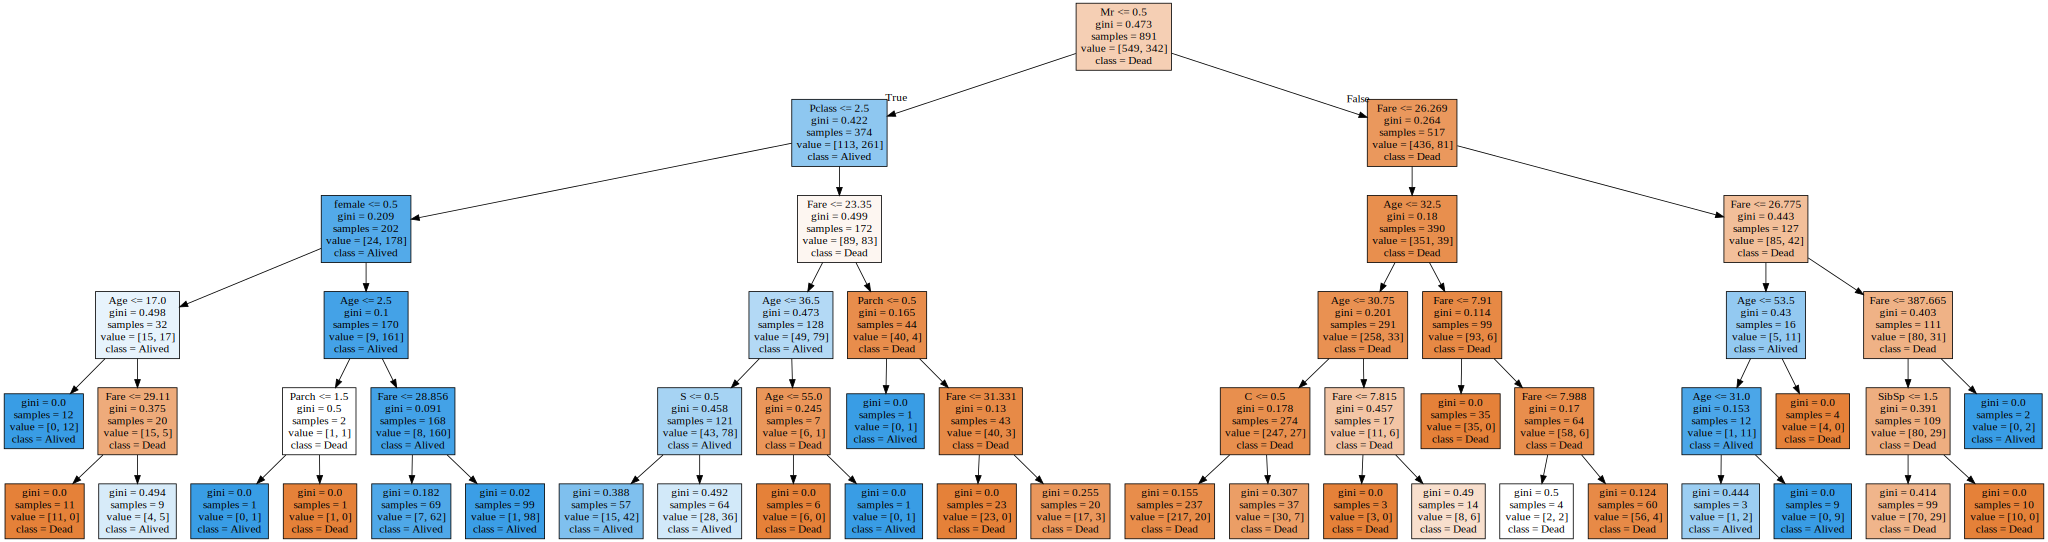

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
x_train = traindf.drop(["PassengerId", "Survived"], axis=1)
y_train = traindf["Survived"]
clf.fit(x_train, y_train)

from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf, feature_names=x_train.columns,
                    class_names=["Dead", "Alived"], filled=True)
graphviz.Source(g)

In [ ]:
# 請不要做無謂的資料處理，不做無為犧牲，改參數即可

In [156]:
from sklearn.ensemble import RandomForestClassifier
# 機器學習調整參數尤為重要
# 設置深度(效果會比較好)，幾棵樹(運用交叉驗證來降低運氣)

# 處理大量數字
import numpy as np

from sklearn.model_selection import cross_val_score
# clf 為訓練集, cv 為切幾分
# 調參數(深度小的3，大的為5)，n_estimators 為多少棵樹(20-50)
# 兩者調時先動一個即可

# clf = RandomForestClassifier()
# 下方為手動設參數
clf = RandomForestClassifier(max_depth=6 , n_estimators=24)
# 也可暴力搜索(讓電腦幫忙調)--對每組都做交叉驗證

x_train = traindf.drop(["PassengerId", "Survived"] , axis = 1)
y_train = traindf["Survived"]

# cross_val_score(clf, x_train, y_train , cv = 10)
# 算平均
np.average(cross_val_score(clf, x_train, y_train , cv = 10))

0.8327672795369423

In [92]:
# 暴力搜索(讓電腦幫忙調)--對每組都做交叉驗證
from sklearn.model_selection import GridSearchCV
# 設定參數---字典(讓運氣減到最低)
p = {
    "max_depth":range(5, 10),
    "n_estimators":range(20, 30)
}

clf = RandomForestClassifier()
search = GridSearchCV(clf, p , cv=10 )
search.fit(x_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 6, 'n_estimators': 20}
0.8372615039281706


In [157]:
clf = RandomForestClassifier(max_depth=6 , n_estimators=24)
clf.fit(x_train, y_train)
x_test = testdf.drop(["PassengerId"], axis = 1)
x_id = testdf["PassengerId"]
clf.predict(x_test)
pre = clf.predict(x_test)

# write to table
result = pd.DataFrame()
result["PassengerId"] = x_id
result["Survived"] = pre
result.to_csv("624.csv", encoding="utf-8" , index= False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [101]:
# 確認每個欄位每個
# print(x_train.columns)
# print(clf.feature_importances_)

c = x_train.columns
i = clf.feature_importances_
show = pd.DataFrame()
show["Column"] = c
show["Importance"] = i
show
# 結果顯示跟當初上方預測的關係差不多

,Column,Importance
0,Pclass,0.132519
1,Age,0.086381
2,SibSp,0.055099
3,Parch,0.026634
4,Fare,0.129083
5,C,0.006544
6,Q,0.008026
7,S,0.019832
8,female,0.106650
9,male,0.200087
